# Introduction to Data Science

## Due Date: November, 04

**Instructions**:

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Then you can safely delete the line

  `raise NotImplementedError()`

- Please fill out the cell below for **every submission**.
- Before you hand this problem, make sure everything runs as expected. You can use the `Validate` button directly above the cells or **restart the kernel and run all cells** by selecting `Kernel --> Restart Kernel and Run All Cells` in the menubar above.
- Don't forget to submit the file until the due date by clicking on `Nbgrader --> Assignment List` and then clicking on `Submit`.
- You can savely add new cells to make additional experiments, but please use the given cells to solve the problems and answer the tasks. Otherwise, the autograder might not be able to grade your answer appropriately and assign the correct number of points.

In [120]:
NAME = "Sebastian Schulz"
EMAIL = "sebastian.schulz@s2021.tu-chemnitz.de"
USERNAME = "schulzs"

---

## Lab 3: Regression

The previous exercises gave an introduction to Python, Numpy and Pandas. Beginning with this exercise, we shift our focus to statistical learning itself. To this end, we will employ the module scikit-learn which offers many functions we will cover over the remaining semester.

### Part A: Linear regression for the Advertising dataset

If not already done, please download the file [Advertising.csv](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2019/Exercises/ps3/Advertising.csv) and move it into the current directory.

**Task**: Import the *Advertising* dataset as `adv` using the `pandas.read_csv` function. Ensure, that the first column is treated as the index column.

In [121]:
import pandas as pd
import numpy as np

# YOUR CODE HERE
adv = pd.read_csv('Advertising.csv', index_col=0)
# Print first entries of adv
print(adv.head(3))

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3


In [122]:
# This cell contains hidden tests. Don't remove it!

For convenience, we extract the values from this `pandas`-DataFrame.
This can be done with the method `to_numpy()`, which returns a `numpy` array.

**Task**: Extract the data in the following manner:
- `X` is of shape `(200, 3)` and contains all predictor variables, i.e., the values from the columns `TV`, `Radio` and `Newspaper`.
- `Y` is of shape `(200,)` and contains the dependent variable `Sales`

In [123]:
adv_mat = adv.to_numpy()
X = adv_mat[:, :3]
Y = adv_mat[:, 3]

In [124]:
# This cell contains hidden tests. Don't remove it!

Note that the variables `X` and `Y` contain only the values itself, and no further information like the column title.

Using the `numpy` function `hsplit`, we can split an array horizontally.
This will become handy in many circumstances.
Here, we split the 2-dimensional numpy array `X` into three 
**2**-dimensional slices `tv`, `radio` and `news`.
Note that the returned arrays have still the second dimension (which is one)!

In [125]:
tv, radio, news = np.hsplit(X,3)

Compute for each of the 3 predictor variables **TV**, **radio** and **newspaper** simple (1-dimensional) linear regressions, e.g.

$$ y^{TV}_i \approx \beta_0^{TV} + \beta_1^{TV} \, x_i^{TV}$$

Use the following function:

    from sklearn.linear_model import LinearRegression
    
Store the intercepts, i.e., the values $\beta_0$ in variables
       
    intercept_tv, intercept_radio and intercept_news
    
and the linear coefficients, i.e., the values $\beta_1$ in variables

    lincoef_tv, lincoef_radio and lincoef_news

To print your results in a nice fashion, you can use a command similar to this f-string

    print(f'y = {intercept_tv} + {lincoef_tv} x TV'))

or alternatively by

    print('y = %5.4f + %5.4f x TV' % (intercept, lincoef))

In [126]:
from sklearn.linear_model import LinearRegression

fhat_tv = LinearRegression().fit(tv, Y)
fhat_radio = LinearRegression().fit(radio, Y)
fhat_news = LinearRegression().fit(news, Y)

intercept_tv = fhat_tv.intercept_
intercept_radio = fhat_radio.intercept_
intercept_news = fhat_news.intercept_

lincoef_tv = fhat_tv.coef_
lincoef_radio = fhat_radio.coef_
lincoef_news = fhat_news.coef_

print(f'y_tv = {intercept_tv} + {lincoef_tv} x TV')
print(f'y_radio = {intercept_radio} + {lincoef_radio} x Radio')
print(f'y_news = {intercept_news} + {lincoef_news} x News')

y_tv = 7.032593549127695 + [0.04753664] x TV
y_radio = 9.311638095158283 + [0.20249578] x Radio
y_news = 12.35140706927816 + [0.0546931] x News


In [127]:
# This cell contains hidden tests. Don't remove it!

You should observe, that the regression coefficients for **TV** and **newspaper** are very similar.
As you already know from the lecture, it is not satisfying from a mathematical point of view to restrict our investigation to the absolute values of the coefficients.


### Part B: Assessing the quality of a linear fit.

In the lecture you learned about different measures for assessing the quality of a linear fit.
In the last exercise, we already implemented a function to compute the mean squared error (MSE).

This time, we want to compare the $R^2$ scores. You can use the method `score()` of a `LinearRegression` to get the $R^2$ values.
Remember that this value is the proportion of variability in $Y$ explained using **TV**, **radio** or **newspaper** as predictor in a 1-dimensional linear regression fit.

**Task**: Compute the $R^2$ scores and store them in variables
    
    R2_tv, R2_radio, R2_news

In [128]:
# YOUR CODE HERE
R2_tv = fhat_tv.score(tv, Y)
R2_radio = fhat_radio.score(radio, Y)
R2_news = fhat_news.score(news, Y)

print("R^2 for TV:        ", R2_tv)
print("R^2 for radio:     ", R2_radio)
print("R^2 for newspaper: ", R2_news)

R^2 for TV:         0.611875050850071
R^2 for radio:      0.33203245544529525
R^2 for newspaper:  0.05212044544430516


In [129]:
# This cell contains hidden tests. Don't remove it!

### Part C: Predicting values

Now we want to compute the predicted value of sales if we restrict our prediction to one input, i.e. **TV**, **radio** or **newspaper**, respectively.
Predict the values $\hat{y}^{TV}$, $\hat{y}^{radio}$ and $\hat{y}^{newspaper}$ using the `LinearRegression`-method `predict()` and store them in variables

    y_tv, y_radio, y_news

In [130]:
y_tv = fhat_tv.predict(tv)
y_radio = fhat_radio.predict(radio)
y_news = fhat_news.predict(news)

In [131]:
# This cell contains hidden tests. Don't remove it!

### Part D: Plotting
Plot the datapoints as well as the corresponding regression line for each of the inputs  **TV**, **radio** or **newspaper**.

You can use the functions `subplots` or `fig.add_subplot` to arrange the plots in one figure.

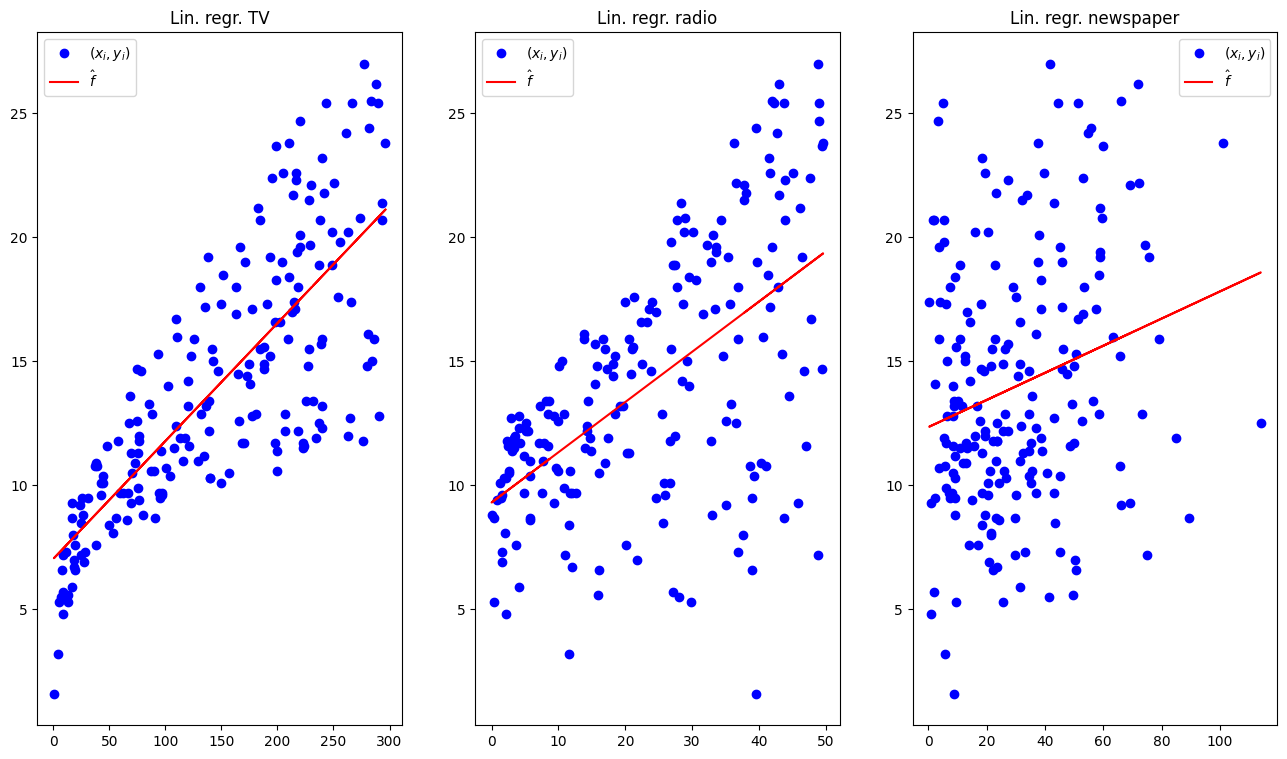

In [132]:
# We plot our findings using subplots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

def plot_datapoints_and_fhat(ax, xs, ys, fhat, title):
    sorted_xs = np.sort(xs)
    ax.plot(xs, ys, 'bo', label='$(x_i,y_i)$')
    ax.plot(sorted_xs, fhat.predict(sorted_xs), color='red', label='$\\hat{f}$')
    ax.legend()
    ax.set_title(title)

fig = plt.figure()
ax_tv = fig.add_subplot(1,3,1)
ax_radio = fig.add_subplot(1,3,2)
ax_news = fig.add_subplot(1,3,3)

plot_datapoints_and_fhat(ax_tv, tv, Y, fhat_tv, 'Lin. regr. TV')
plot_datapoints_and_fhat(ax_radio, radio, Y, fhat_radio, 'Lin. regr. radio')
plot_datapoints_and_fhat(ax_news, news, Y, fhat_news, 'Lin. regr. newspaper')


### Part E: Statistical functions

Take a closer look at the correlation matrix for the `DataFrame` `adv`.
You can use the method `corr()` that is implemented for pandas 
`DataFrames`.
Which features are correlated most strongly?

In [133]:
features = adv[['TV', 'radio', 'newspaper']]
corr = features.corr().unstack()
print(corr[corr < 1].sort_index())

TV         newspaper    0.056648
           radio        0.054809
newspaper  TV           0.056648
           radio        0.354104
radio      TV           0.054809
           newspaper    0.354104
dtype: float64


Name the two **features**, that are correlated most strongly in the next cell!

TV newspaper

Investigate the statistical significance of the medium **newspaper** in a linear regression involving only this feature. Use a **t-test** for this purpose as described in the lecture notes or in the book *An Introduction to Statistical Learning*.

You should observe the following values:

|Coefficient | Estimate | SE | t-statistic | p-value|
|:-----------|----------|----|-------------|--------|
| $\beta_0$  | 12.351 | 0.621 | 19.88 | < 0.0001 |
| $\beta_{newspaper}$ | 0.055 | 0.017 | 3.30 | 0.00115


You should use `scipy` to get the $t$-distribution using

    from scipy.stats import t
    
The cumulative distribution function at a point `x` for `n` degrees of freedom can than be called by

    t.cdf(x, n)

In [134]:
# Import the t-distribution from scipy
from scipy.stats import t
from scipy.stats import linregress
from scipy.stats import ttest_ind

result = linregress(news.squeeze(), Y)
t_statistic_intercept = result.intercept / result.intercept_stderr
t_statistic_slope = result.slope / result.stderr
dof = np.shape(news)[0] - 2
pvalue_intercept = 2 *(1 - t.cdf(np.abs(t_statistic_intercept), df=dof))

print("Intercept: %7.4f" % result.intercept)
print("Lin. coef: %7.4f" % result.slope)
print("")
print("std-error Intercept: %7.4f" % result.intercept_stderr)
print("std-error Lin. coef: %7.4f" % result.stderr)
print("")
print("t-statistic Intercept: %6.2f" % t_statistic_intercept)
print("t-statistic Lin. coef: %6.2f" % t_statistic_slope)
print("")
print("P-value Intercept: %7.5f" % pvalue_intercept)
print("P-value Lin. coef: %7.5f" % result.pvalue)

Intercept: 12.3514
Lin. coef:  0.0547

std-error Intercept:  0.6214
std-error Lin. coef:  0.0166

t-statistic Intercept:  19.88
t-statistic Lin. coef:   3.30

P-value Intercept: 0.00000
P-value Lin. coef: 0.00115


### Part F: Linear regression on all predictors

Now construct a linear regression on all three predictor variables, i.e.

$$y_i ≈ \beta_0 + \beta_{TV} x^{TV}_i + \beta_{radio} x^{radio}_i + \beta_{newspaper} x^{newspaper}_i$$

Ensure that the intercept and linear regression coefficients are stored in the variables

    beta_0, beta_tv, beta_radio and beta_news

y = 2.9389 + 0.0458 x TV + 0.1885 x radio + -0.0010 x newspaper


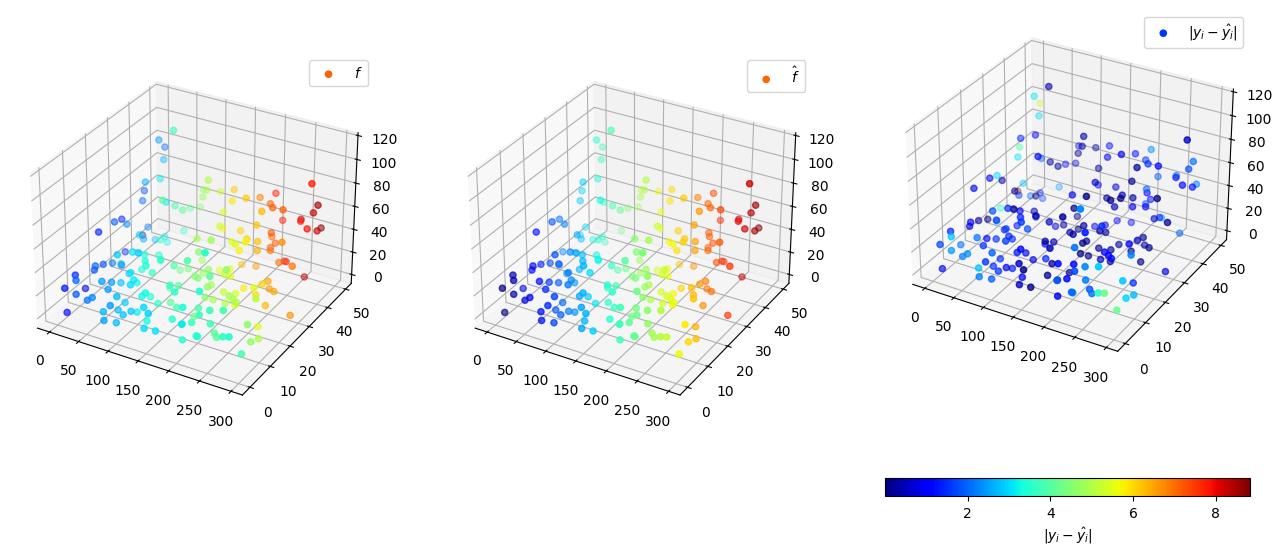

In [173]:
fhat = LinearRegression().fit(X, Y)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1, projection='3d')
sales_scatter = ax.scatter3D(tv, radio, news, c=Y, cmap='jet', label='$f$')
ax.legend()

pred_values = fhat.predict(X)
ax = fig.add_subplot(1, 3, 2, projection='3d')
fhat_scatter = ax.scatter3D(tv, radio, news, c=pred_values, cmap='jet', label='$\\hat{f}$')
ax.legend()

ax = fig.add_subplot(1, 3, 3, projection='3d')
absolute_error = np.abs(Y-pred_values)
error_scatter = ax.scatter3D(tv, radio, news, c=absolute_error, cmap='jet', label='$|y_i-\\hat{y_i}|$')
cbar = fig.colorbar(error_scatter, orientation='horizontal', label='$|y_i-\\hat{y_i}|$')
ax.legend()

beta_0 = fhat.intercept_
beta_tv, beta_radio, beta_news = fhat.coef_

print('y = %5.4f + %5.4f x TV + %5.4f x radio + %5.4f x newspaper' % (beta_0, beta_tv, beta_radio, beta_news))

In [136]:
# This cell contains hidden tests. Don't remove it!

What portion of the variance (between 0 and 1) is explained by this linear regression fit? Store your answer in the variable `explained_var`.

In [137]:
pred_Y = fhat.predict(X)
RSS = np.sum((Y - pred_Y)**2)
TSS = np.sum((Y - np.mean(Y))**2)
r2 = 1 - RSS/TSS
explained_var = r2

In [138]:
print('The portion of the variance that can be explained by the full model is about %8.6f' % explained_var)

# This cell contains hidden tests. Don't remove it!

The portion of the variance that can be explained by the full model is about 0.897211


Now perform a linear regression that incorporates only the predictors **TV** and **radio**.
Compute the $R^2$-value of this linear regression model and compare it to the $R^2$-value of the full multiple linear regression.

In [139]:
fhat_tv_radio = LinearRegression().fit(X[:, :2], Y)
pred_Y_tv_radio = fhat_tv_radio.predict(X[:, :2])
RSS = np.sum((Y - pred_Y_tv_radio)**2)
TSS = np.sum((Y - np.mean(Y))**2)
R2_tv_radio = 1 - RSS/TSS

In [140]:
print('The R^2 score for the model using TV and Radio as predictors is %8.6f' % R2_tv_radio)

# This cell contains hidden tests. Don't remove it!

The R^2 score for the model using TV and Radio as predictors is 0.897194


You should observe that the $R^2$-score for the linear regression fit incorporating all three features is only marginally larger than the score using only **TV** and **radio** for the prediction.
Thus, it might be sufficient to exclude the **feature** newspaper from our prediction.

The procedure we did today is called *feature selection* is should be one of the first steps in every statistical learning problem.

### Part G: Computing the t-statistic for the full model

We have already seen, that the **t-test** comes in handy when one has to decide whether a coefficient for a single feature is significant or not.
As has been outlined in the lecture, one can also use the t-test in a multiple linear regression fit

$$ Y = X \beta + \varepsilon $$

while the intercept is incorporated into $X$ by stacking a column containing only ones in front of the original matrix $X$.

The formula to compute the test statistic in this generalized setting is

$$ t_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}}, $$

while $\hat \beta_j$ is the $j$-th entry of the coefficient vector

$$ \hat \beta = (X^\top X)^{-1} X^\top y, $$

$\hat{\sigma}$ is the unbiased estimate of $\sigma$, which is determined by

$$ \hat{\sigma} = \sqrt{\frac{1}{n-p-1} \, \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

and $v_j$ is the $j$-th diagonal element of the matrix $(X^\top X)^{-1}$.

Then $t_j$ is distributed according to a $t$-distribution with $n-p-1$ degrees of freedom (dofs). 

**Task**: Compute the values in the following statistic and try to print it in a similar way. 

|  Coefficient     | Estimate  | SE    | t-statistic | p-value |
|:-----------------|-----------|-------|-------------|---------|
| $\beta_0$        | 2.939     |0.3119 | 9.42        | < 0.0001|
| $\beta_{TV}$     | 0.046     |0.0014 | 32.81       | < 0.0001|
| $\beta_{radio}$  | 0.189     |0.0086 | 21.89       | < 0.0001|
| $\beta_{news}$   | −0.001    |0.0059 | −0.18       | 0.8599  |




In [170]:
from numpy.linalg import inv

X_ = np.insert(X, 0, 1, axis=1)
n = np.shape(X_)[0]
p = np.shape(X_)[1]
sigma2 = 1/(n - p) * np.sum((Y - pred_Y)**2)
v = np.diag(inv((X_.T @ X_)))

t_statistic_0 = fhat.intercept_ / (np.sqrt(sigma2) * np.sqrt(v[0]))
t_statistic_lin = fhat.coef_ * np.divide(1, (np.sqrt(sigma2) * np.sqrt(v[1:])))

dof = n - p
p_value_0 = 2 * (1 - t.cdf(np.abs(t_statistic_0), df=dof))
p_value_lin = 2 * (1 - t.cdf(np.abs(t_statistic_lin), df=dof))

se_intercept = fhat.intercept_ / t_statistic_0
se_lin = fhat.coef_ / t_statistic_lin

print(f'Intercept: {fhat.intercept_}')
print(f'Lin. coef: {fhat.coef_}')
print('')
print(f'std-error Intercept: {se_intercept}')
print(f'std-error Lin. coef: {se_lin}')
print('')
print(f't-statistic Intercept: {t_statistic_0}')
print(f't-statistic Lin. coef: {t_statistic_lin}')
print('')
print(f'P-value Intercept: {p_value_0}')
print(f'P-value Lin. coef: {p_value_lin}')

Intercept: 2.938889369459412
Lin. coef: [ 0.04576465  0.18853002 -0.00103749]

std-error Intercept: 0.3119082363217914
std-error Lin. coef: [0.0013949  0.00861123 0.00587101]

t-statistic Intercept: 9.422288440076333
t-statistic Lin. coef: [32.80862443 21.89349606 -0.17671459]

P-value Intercept: 0.0
P-value Lin. coef: [0.         0.         0.85991505]
